# Tank Royale

```{image} img/portada.png
:alt: portada
:class: bg-primary mb-1
:width: 450px
:align: center
```

Los juegos de estrategia son una de las mejores maneras de matar el tiempo. Hasta el momento hemos implementado algunos juegos que requerían pensar, pero no los podemos calificar como juegos de estrategia en los que tenemos que adelantarnos a los movimientos del adversario. En este ejercicio vamos a implementar un juego de estrategia de combate para dos jugadores que intentan destruirse mutuamente. Las reglas son las siguientes:

* Dos jugadores compiten
* Cada uno tiene un tanque que mueve por el tablero intentando derribar el tanque del oponente
* El primer jugador en derribar el tanque del oponente gana.
* Para simplificar nuestro juego, los jugadores jugarán por turnos y tendrán 5 posibles jugadas:
    * Mover tanque a la derecha
    * Mover tanque a la izquierda
    * Mover tanque arriba
    * Mover tanque abajo
    * Disparar (se proporcionará un ángulo del disparo)

```{seealso}
Hay muchas versiones de estos juegos. Una versión similar a lo que te proponemos puedes encontrarla [aquí](https://www.minijuegos.com/juego/tank-trouble).
```

## Definición de obstáculos

Para el diseño del campo de batalla, vamos a utilizar obstáculos rectangulares que definiremos mediante las coordenadas de sus vértices. Para definir estos obstáculos vamos a utilizar dos variables **obstacles_x** y **obstacles_y**. La lista **obstacles_x** contiene una secuencia de sublistas con las coordenadas X del vértice inferior izquierdo y del vértice superior derecho del obstáculo. La lista **obstacles_y** contiene una secuencia de sublistas con las coordenadas Y de los mismos puntos.

Por ejemplo:

:::{code}
obstacles_x = [ [0, 0.2], [0.3, 0.7], [0, 0.3], [0.8, 0.85], [0.55, 0.85], [0.55, 1.0], [0.0, 0.4], [0.7, 0.75] ]
obstacles_y = [ [0, 0.2], [0.15, 0.2], [0.4, 0.45], [0.2, 0.6], [0.6, 0.65], [0.8, 1.25], [0.7, 0.75], [0.0, 0.2] ]
:::

Si nos fijamos en la primera sublista vemos que las coordenadas son [0.0.2] tanto para las X como para las Y. Estas coordenadas están definiendo un rectánculo cuyo vértice inferior izquierdo se encuentra en la coordenada (0,0) y el vértice superior derecho se encuentra en la coordenada (0.2,0.2). En el caso del segundo obstáculo, el vertice inferior izquierdo se encuentra en la coordenada (0.3,0.15) y el vértice superior derecho se encuentra en la coordenada (0.7,0.2). Y así sucesivamente con todos los obstáculos.

:::{note}
Para dibujar los rectángulos usaremos la siguiente función de la librería **matplotlib**:

    patches.Rectangle((x,y), width, height, angle=0.0, **kwargs)
                    +------------------+
                    |                  |
                  height               |
                    |                  |
                   (x,y)---- width ----+


    * xy : (float, float): The anchor point.
    * width : float : Rectangle width.
    * height: float : Rectangle height.
    * angle : float, default: 0 : Rotation in degrees anti-clockwise about xy.                   
:::


:::{seealso}
Puedes encontrar más información en la documentación de matplotlib [aquí](https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Rectangle.html)
:::

Como la función **patches.Rectangle** utiliza unos argumentos diferentes, tenemos que convertir la definición de nuestros obstáculos rectangulares de un formato en el que conocemos el vértice inferior izquierdo y el superior derecho a un formato en el que conocemos el vértice inferior izquierdo, el ancho y el alto.

Por ejemplo, el primer obstáculo que hemos definido de vértices (0,0) y (0.2,0.2) se representa con el siguiente código:

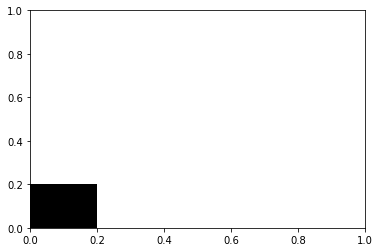

In [2]:
from matplotlib import pyplot as plt, patches

figure, ax = plt.subplots()
ax.add_patch(patches.Rectangle((0, 0), .2, .2, facecolor='black', linewidth=2))
plt.show()

Puedes comprobar como los vérticves inferior izquierdo y superior derecho se corresponden con las coordenadas (0,0) y (0.2,0.2) respectivamente.

Veamos también el segundo obstáculo que hemos definido con los vértices (0.3, 0.15) y (0.7, 0.2). En este caso, este obstáculo se representa como:

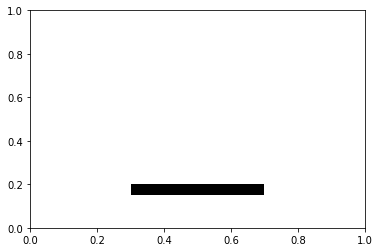

In [3]:
figure, ax = plt.subplots()
ax.add_patch(patches.Rectangle((0.3, 0.15), 0.4, 0.05, facecolor='black', linewidth=2))
plt.show()

Puedes comprobar como los vérticves inferior izquierdo y superior derecho se corresponden con las coordenadas (0.3, 0.15) y (0.7, 0.2) respectivamente.

Para adaptar las coordenadas en formato vértices a coordenadas en formato **(x,y,width,height)** vamos a implementar la función **format_coord(x,y)** que recibe  como argumentos de entrada:

* **x** contiene la lista de coordenadas **obstacles_x**
* **y** contiene la lista de coordenadas **obstacles_y**

La función devuelve una lista con el mismo número de elementos, pero en formato **(x,y,width,height)**.

### Solución:

In [4]:
def format_coord(x,y):
    obstacles = []
    for i in range(len(x)):
        coord_x_y = ( x[i][0], y[i][0] )
        width = x[i][1]-x[i][0]
        height = y[i][1]-y[i][0]
        obstacles.append([coord_x_y, width, height])
    return obstacles

Vamos a validar su funcionamiento invocándola con las listas de coordenadas de obstáculos **obstacles_x** y **obstacles_y**.

In [5]:
obstacles_x =[ [0, 0.2], [0.3, 0.7], [0, 0.3], [0.8, 0.85], [0.55, 0.85], [0.55, 1.0], [0.0, 0.4], [0.7, 0.75] ]
obstacles_y = [ [0, 0.2], [0.15, 0.2], [0.4, 0.45], [0.2, 0.6], [0.6, 0.65], [0.8, 1.25], [0.7, 0.75], [0.0, 0.2] ]

obstacles = format_coord(obstacles_x,obstacles_y)

Podemos comprobar que la conversión ha tenido éxito representándo todos los obstáculos:

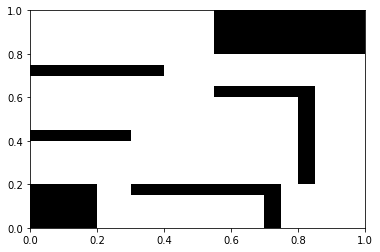

In [6]:
figure, ax = plt.subplots()
for (obs_x, obs_y), width, height  in obstacles:
    ax.add_patch(patches.Rectangle((obs_x, obs_y), width, height, facecolor='black', linewidth=2))
plt.show()

Y de esta manera tan sencilla ¡tenemos un campo de batalla!

## Definición de los tanques

Para el diseño de los tanques vamos a necestiar una variable de tipo DICT que contenga los valores para diferentes parámetros. El diccionario **tank_parameters** contiene la posición, diferentes dimensiones, el color y el ángulo del cañón de todos los tanques que identifica junto con un ID de tanque:

* **tank_coord_x** representa la coordenada X en la que se empieza a dibujar el tanque
* **tank_coord_y** representa la coordenada Y en la que se empieza a dibujar el tanque
* **tank_angle** representa el angulo con el que está apuntando el cañon del tanque
* **tank_width** representa el ancho del tanque 
* **tank_height** representa la altura del tanque
* **canon_width** representa el ancho del cañón 
* **canon_height** representa la altura del cañón
* **color** color del tanque

El motivo de tener las dimensiones tan especificadas es poder incluir nuevas dinámicas de juego que afecten a sus dimensiones otorgándoles diferentes propiedades. Aunque por el momento, definiremos dos tanques del mismo tamaño. Este es un esquema que sirve de ayuda para dibujar cada uno de los tanques:

```{image} img/tanque.png
:alt: tanque
:class: bg-primary mb-1
:width: 550px
:align: center
```

Por ejemplo, el siguiente diccionario definiría dos tanques con sus posiciones, dimensiones, ángulo de disparo y color.

In [10]:
tank_parameters = {
        1: {'tank_coord_x':0,  'tank_coord_y':0,  'tank_angle':0, "tank_width": 0.1, 
            "tank_height": 0.01,  "canon_width": 0.01, "canon_height": 0.05, "color":"blue"},
        2: {'tank_coord_x':1,  'tank_coord_y':1,  'tank_angle':1, "tank_width": 0.1, 
            "tank_height": 0.01,  "canon_width": 0.01, "canon_height": 0.05, "color":"red"}
    }

Una vez explicada la forma en la que se define un tanque, vamos a programar una función **draw_tank(ax, tank_parameters, player)** que recibe como argumentos de entrada:

* **ax** con la variable que contiene los *axex* en los que vamos a representar los tanques 
* **tank_parameters** con el diccionario que describe los tanques
* **player** con el ID del tanque que queremos dibujar

La función no devuelve ninguna variable, sólamente se limita a pintar el tanque en el entorno identificado mediante la variable **ax**. A continuación mostramos un ejemplo que dibuja un único tanque:

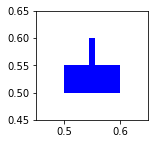

In [9]:
tank_parameters = {
        1: {'tank_coord_x':0.5,  'tank_coord_y':0.5,  'tank_angle':0, "tank_width": 0.1, 
            "tank_height": 0.05,  "canon_width": 0.01, "canon_height": 0.05, "color":"blue"}
    }
figure, ax = plt.subplots(figsize=(2,2))
ax.set(xlim=(0.45, 0.65), ylim=(0.45, 0.65))
draw_tank(ax, tank_parameters,1)

::::{note}
Para evitar ocupar demasiado espacio, hemos reducido el tamaño de la figura completa con el argumento **figsize** y nos hemos enfocado exclusivamente en la zona ocupada por el tanque con el comando **ax.set**:

:::{code}
figure, ax = plt.subplots(figsize=(2,2))
ax.set(xlim=(0.45, 0.65), ylim=(0.45, 0.65))
:::
::::

### Solución:

In [10]:
import numpy as np
import math

def draw_tank(ax, tank_parameters, player):

    pos_x = tank_parameters[player]["tank_coord_x"]
    pos_y = tank_parameters[player]["tank_coord_y"]
    dim_tank_x = tank_parameters[player]["tank_width"]
    dim_tank_y = tank_parameters[player]["tank_height"]
    dim_canon_x = tank_parameters[player]["canon_width"]
    dim_canon_y = tank_parameters[player]["canon_height"]
    angle = tank_parameters[player]["tank_angle"]
    color = tank_parameters[player]["color"]
    ax.add_patch(patches.Rectangle((pos_x, pos_y), dim_tank_x, dim_tank_y, linewidth=2, facecolor=color))

    pos_canon_x = pos_x
    pos_canon_y = pos_y

    if (-45 <= angle <= 45):      # weapon upward
        pos_canon_x += dim_tank_x/2 - (dim_canon_x/2)
        pos_canon_y += dim_tank_y
    
    elif (45 <= angle <= 3*45):   # weapon leftward
        pos_canon_y +=  (dim_tank_y/2) - (dim_canon_x/2)
    
    elif (3*45 <= angle <= 5*45): # weapon downward
        pos_canon_x += (dim_tank_x/2) + (dim_canon_x/2)
    
    else:                         # weapon rightward
        pos_canon_x += dim_tank_x
        pos_canon_y += (dim_tank_y/2) + (dim_canon_x/2)
        
    ax.add_patch(patches.Rectangle((pos_canon_x, pos_canon_y), dim_canon_x, dim_canon_y, linewidth=2, facecolor=color, angle = angle))

:::{note}
Nosotros hemos definido los grados de disparo respecto a la vertical, pero se puede hacer de muchas otras formas.
:::

Ahora podemos comprobar los diferentes ángulos de tiro variando la propiedad **'tank_angle'** de nuestro diccionario:

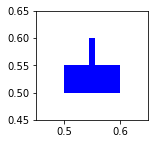

In [14]:
tank_parameters = {
        1: {'tank_coord_x':0.5,  'tank_coord_y':0.5,  'tank_angle':0, "tank_width": 0.1, 
            "tank_height": 0.05,  "canon_width": 0.01, "canon_height": 0.05, "color":"blue"}
    }
figure, ax = plt.subplots(figsize=(2,2))
ax.set(xlim=(0.45, 0.65), ylim=(0.45, 0.65))
draw_tank(ax, tank_parameters,player=1)

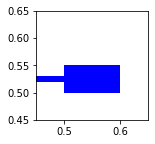

In [15]:
tank_parameters = {
        1: {'tank_coord_x':0.5,  'tank_coord_y':0.5,  'tank_angle':90, "tank_width": 0.1, 
            "tank_height": 0.05,  "canon_width": 0.01, "canon_height": 0.05, "color":"blue"}
    }
figure, ax = plt.subplots(figsize=(2,2))
ax.set(xlim=(0.45, 0.65), ylim=(0.45, 0.65))
draw_tank(ax, tank_parameters,player=1)

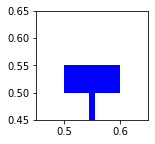

In [16]:
tank_parameters = {
        1: {'tank_coord_x':0.5,  'tank_coord_y':0.5,  'tank_angle':180, "tank_width": 0.1, 
            "tank_height": 0.05,  "canon_width": 0.01, "canon_height": 0.05, "color":"blue"}
    }
figure, ax = plt.subplots(figsize=(2,2))
ax.set(xlim=(0.45, 0.65), ylim=(0.45, 0.65))
draw_tank(ax, tank_parameters,player=1)

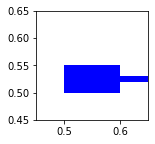

In [17]:
tank_parameters = {
        1: {'tank_coord_x':0.5,  'tank_coord_y':0.5,  'tank_angle':270, "tank_width": 0.1, 
            "tank_height": 0.05,  "canon_width": 0.01, "canon_height": 0.05, "color":"blue"}
    }
figure, ax = plt.subplots(figsize=(2,2))
ax.set(xlim=(0.45, 0.65), ylim=(0.45, 0.65))
draw_tank(ax, tank_parameters,player=1)

También podemos probar la representación de varios tanques, si los hubiera:

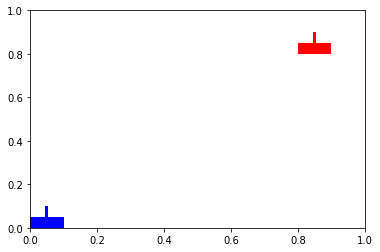

In [18]:
from matplotlib import pyplot as plt, patches
tank_parameters = {
        1: {'tank_coord_x':0,  'tank_coord_y':0,  'tank_angle':0, "tank_width": 0.1, 
            "tank_height": 0.05,  "canon_width": 0.01, "canon_height": 0.05, "color":"blue"},
        2: {'tank_coord_x':0.8,  'tank_coord_y':0.8,  'tank_angle':0, "tank_width": 0.1, 
            "tank_height": 0.05,  "canon_width": 0.01, "canon_height": 0.05, "color":"red"}
    }
figure, ax = plt.subplots()
draw_tank(ax, tank_parameters,player=1)
draw_tank(ax, tank_parameters,player=2)

## Creación tablero y los tanques

Una vez que hemos definido los obstáculos y los tanques, vamos a implementar la función **display_scenario(obstacles, tank_parameters)** que representa ambos elementos: 

```{image} img/tablero.png
:alt: tablero
:class: bg-primary mb-1
:width: 450px
:align: center
```

Esta función recibirá como argumentos de entrada:

* **obstacles** es una variable de tipo lista de listas que contiene la información (coordenadas) de los obstáculos del mapa. Esta lista es la salida de la función **format_coord** que hemos programado en el apartado anterior
* **tank_parameters** es una variable de tipo diccionario que contiene la posición y dimensión de los tanques

La función sólo debe devolver la variable **ax** que utilicemos para representar los objetos en el espacio de dibujo.

### Solución:

In [19]:
def display_scenario(obstacles, tank_parameters, plot=True):
    figure, ax = plt.subplots(figsize=(5,5))
    for coord in obstacles:
        ax.add_patch(patches.Rectangle(coord[0], coord[1], coord[2], linewidth=2, facecolor='black'))
    for idd in tank_parameters.keys():
        draw_tank(ax, tank_parameters,idd)
    if plot: plt.show()
    return ax

Si te fijas, esta implementación es capaz de representar todos los tanques que se hayan definido en la variable **tank_parameters**. Aunque para nuestro juego sólo vamos a usar dos,sería relativamente facil de implementar una modalidad de juego para más jugadores o incluso un modo en el que cada usuario contara con varios vehículos.

::::{note}
El propósito de devolver **ax** es que podamos actuar sobre las variables de la visualización para variar su tamaño, añadir anotaciones o títulos o quedarnos con una porción de la misma. En nuestra implementación del juego no vamos a utilizar esa variable con esos propósitos, pero es útil tener acceso a ella para futuras mejoras. 

Para evitar que Python muestre el contenido de la variable **ax** cada vez que invoquemos a la función **display_scenario**, es suficiente con invocar a la función de esta manera:

:::{code}
_ = display_scenario(obstacles, tank_parameters)
:::

Por otro lado, puedes estar preguntándote la utilidad de esta línea de código:

:::{code}
if plot: plt.show()
:::

Su funcionalidad es decidir si vamos visualizar el escenario o no. Pero ¿qué sentido tiene? ¿para qué una función llamada **display_scenario** si no vamos a sacarlo por pantalla?. Tienes razón, el propósito es visualizarlo. Pero en el momento en el que hacemos un **plt.show()**, ya no podemos alterar ese escenario. En la mayoría de las ocasiones en las que vamos a invocar a la función  **display_scenario** queremos representarlo y no tendremos intención de modificarlo, pero más adelante, vamos a representar los disparos, y para ello, vamosa a ir añadiendo puntos a la trayectoria de la bala. Estos puntos tenemos que añadirlos utilizando el objeto **ax** que devuelve nuestra función **display_scenario**, y para que estos puntos puedan añadirse al escenario, no deberíamos haber realizado un **plt.show()** con anterioridad.

Por eso, cuando queramos que la escena sea estática, invocaremos a la función como:

:::{code}
display_scenario(obstacles, tank_parameters)
:::

Pero cuando queramos añadir la trayectoria del disparo, la invocaremos como:

:::{code}
display_scenario(obstacles, tank_parameters, plot=False)
:::

No te preocupes si no lo ves claro, según vayamos progresando en la implementación del juego lo entenderás mejor.
::::

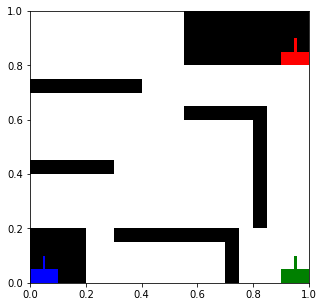

In [20]:
from matplotlib import pyplot as plt, patches

obstacles_x =[ [0, 0.2], [0.3, 0.7], [0, 0.3], [0.8, 0.85], [0.55, 0.85], [0.55, 1.0], [0.0, 0.4], [0.7, 0.75] ]
obstacles_y = [ [0, 0.2], [0.15, 0.2], [0.4, 0.45], [0.2, 0.6], [0.6, 0.65], [0.8, 1.25], [0.7, 0.75], [0.0, 0.2] ]
obstacles = format_coord(obstacles_x,obstacles_y)

tank_parameters = {
        1: {'tank_coord_x':0,  'tank_coord_y':0,  'tank_angle':0, "tank_width": 0.1, 
            "tank_height": 0.05,  "canon_width": 0.01, "canon_height": 0.05, "color":"blue"},
        2: {'tank_coord_x':0.9,  'tank_coord_y':0.8,  'tank_angle':0, "tank_width": 0.1, 
            "tank_height": 0.05,  "canon_width": 0.01, "canon_height": 0.05, "color":"red"},
        3: {'tank_coord_x':0.9,  'tank_coord_y':0,  'tank_angle':0, "tank_width": 0.1, 
            "tank_height": 0.05,  "canon_width": 0.01, "canon_height": 0.05, "color":"green"}
    }

_ = display_scenario(obstacles, tank_parameters)

## Calcular movimiento tanque

El movimiento del tanque se va a realizar mediante las teclas "A","D","W" y "S". Para traducir la pulsación de una tecla en un movimiento en el campo de combate vamos a implementar la función **move_tank(x,y, units, direction)** que devuelve una tupla con las coordenadas del tanque después de realizar el movimiento solicitado. Los argumentos de entrada son:

* **x** con la última coordnada x del tanque
* **y** con la última coordnada y del tanque
* **units** con el número de unidades que se va a mover el tanque
* **direction** con la dirección en la que se moverá el tanque. Las direcciones posibles son:
    * **d** => derecha
    * **a** => izquierda
    * **w** => arriba
    * **s** => abajo

A modo de aclaración, el siguiente código muestra qué salidas devería devolver la función **move_tank** después de realizar el mismo movimiento en las cuatro direcciones, partiendo de un tanque situado en el centro de la pantalla (0.5,0.5):

In [22]:
print("Right:",move_tank(0.5,0.5,0.2,'d'))
print("Left: ",move_tank(0.5,0.5,0.2,'a'))
print("Up:   ",move_tank(0.5,0.5,0.2,'w'))
print("Down: ",move_tank(0.5,0.5,0.2,'s'))

Right: (0.7, 0.5)
Left:  (0.3, 0.5)
Up:    (0.5, 0.7)
Down:  (0.5, 0.3)


### Solución:

In [21]:
def move_tank(x,y, units, direction): 
    # w a s d => arriba, abajo, izquierda, derecha
    new_x = x
    new_y = y
    if direction == 'd':
        new_x += units
    elif direction == 'a':
        new_x -= units
    elif direction == 'w':
        new_y += units
    else: # direction == 's'
        new_y -= units
    return round(new_x,2), round(new_y,2)

::::{warning}
Si te preguntas el motivo de devolver una salida redondeada a dos decimales, tiene que ver con los errores de coma flotante. Por ejemplo en esta operación:

:::{code}
0.1+0.05
:::
0.15000000000000002

Como puedes imaginar, un decimal en la posición 17 no es grave para la inmensa mayoría de aplicaciones. Pero cuando trabajamos con coordenadas, estamos intentando emular un sistema discreto. Si no hacemos este redondeo, a la hora de detectar si hemos topado con una pared o un obstáculo podemos tener problemas.
::::

:::{seealso}
Puedes obtener más información sobre este tema [aquí](https://www.geeksforgeeks.org/floating-point-error-in-python/) o [aquí](https://docs.python.org/3/tutorial/floatingpoint.html).
:::

## Calcular la trayectoria de un disparo

Una vez que un jugador decide disparar con un determinado ángulo, tenemos que calcular la trayectoria del disparo antes de saber si un tanque enemigo ha sido alcanzado. Vamos a implementar la función **shoot_rays(x,y,angle)** que recibe como parámetros:

* **x** con la coordenada x inicial de la bala
* **y** con la coordenada y inicial de la bala
* **angle** cib el ángulo del disparo con respecto a la vertical (en grados)

La función tendrá que devolver la posición del disparo en varios instantes de su trayectoria mediante dos vectores **new_x** y **new_y**. Si definimos el paso con la variable **step**, las formulas que estiman la posición son: 

:::{code}
x[n] = x[n-1] + sin(-angle)*step
y[n] = y[n-1] + cos(-angle)*step
:::

Por ejemplo:

:::{code}
new_x, new_y = shoot_rays(x=0,y=0,angle=45)
new_x = [0, -0.0070710678118654745, -0.014142135623730949, -0.021213203435596423...
new_y = [0, 0.007071067811865476, 0.014142135623730952, 0.021213203435596427...
:::  

:::{tip}
El número de coordenadas que debemos devolver debería depender de la posición del tanque y del ángulo de tiro. Esto requiriría hacer uso de un poco de trigonometría. En este caso, vamos a optar por la opción más sencilla, que es hacer 200 iteracciones en pasos de 0.01, y más adelante descartaremos aquellas coordenadas que excedan los rangos de nuestros ejes de juego.
:::

### Solución:

In [23]:
def shoot_rays(x,y,angle):
    step = 0.01
    radians = -(angle* math.pi)/180 
    new_x = [x]
    new_y = [y]
    for i in range(200): 
        new_x.append(new_x[i]+np.sin(radians)*step)
        new_y.append(new_y[i]+np.cos(radians)*step)
    return new_x, new_y

::::{note}
Calculamos el ángulo en gradiantes de esta forma:
:::{code}
radians = -(angle* math.pi)/180
::: 
Para ser coherentes con la decisión que hemos tomado de medir los grados respecto de la vertical.
::::

Ahora podemos confirmar las coordenadas de la trayectoria de la bala en caso de disparar con un ángulo de 0 grados:

In [24]:
new_x,new_y=shoot_rays(0,0.5,0)
print("New X: ",new_x[:5])
print("New Y: ",new_y[:5])

New X:  [0, 0.0, 0.0, 0.0, 0.0]
New Y:  [0.5, 0.51, 0.52, 0.53, 0.54]


Con la ejecución anterior podemos comprobar que, efectivamente, el disparo progresa en dirección vertical ascendente.

## Detección de paredes u obstáculos

Una vez que un jugador ha realizado un disparo, tenemos que ser capaces de detectar si ese disparo impacta con un tanque o por el contrario, impacta con alguna paredo u obstáculo intermedio. Para ello hemos dibujado un esquema para ayudar a entender cómo vamos a hacerlo. El cuadrado azul de la figura simula un obstáculo y la recta es la trayectoria del disparo calculada anteriormente:

```{image} img/detectar_si_rebote.png
:alt: tanque
:class: bg-primary mb-1
:width: 450px
:align: center
```

El mecanismo que vamos a seguir es ir analizando todos los puntos de la trayectoria del disparo e ir comprobando si este se encuentra entre algún intervalo de nuestra lista de obstaculos. Esta tarea la vamos a codificar en la función **impact_found(x_coord, y_coord, obstacles_x, obstacles_y)** que recibe los argumentos:

* **x_coord** y **y_coord** con las listas de coordenadas de los puntos de la trayectoria del disparo
* **obstacles_x** y **obstacles_y** con las listas de coordenadas de los obstáculos 

La función **impact_found** debe devolver una variable booleana de valor **True** en caso de impacto con obstáculo o **False** en caso contrario.

La detección de paredes es más sencilla porque basta con comprobar si las coordenadas de un punto de la trayectoria exceden los límites de nuestro campo de batalla. Para ello vamos a implementar la función **out_of_bounds(x_coord, y_coord)** que recibe el valor X y el valor Y de una coordenada y devuelve **True** si alguna de ambas supera los límites del escenario o **False** en caso de que ambas coordenadas estén dentro.

:::{tip}
Para considerar que el disparo ha topado con un obstáculo, hay que comprobar que las dos coordenadas, X e Y, se encuentran en los intervalos definidos en la lista de obstáculos.
:::

### Solución:

In [25]:
def impact_found(x_coord, y_coord, obstacles_x, obstacles_y):
    num = len(obstacles_x)
    impact = False
    i = 0
    while (i < num) and (not impact):
        if (obstacles_x[i][0] < x_coord < obstacles_x[i][1]) and (obstacles_y[i][0] < y_coord < obstacles_y[i][1]):
            impact = True
        i+=1
    return impact

In [26]:
def out_of_bounds(x_coord, y_coord):
    if (x_coord > 1) or (x_coord < 0) or (y_coord > 1) or (y_coord < 0):
        return True
    else:
        return False

:::{warning}
¡Ojo! Dependiendo de de si utilizas desigualdades estrictas (< y >) o no (<= y >=), la función **impact_found** considerará que estar pared con pared contra un obstáculo será un impacto o no. 

La detección de impactos mediante desigualdades es, precisamente, el bloque de código que se ve más afectado por el error de precisión descrito unos párrafos antes. Y es que si tenemos un tanque cuyo vertize inferior derecho se encuentra en la posición (0.15000000000000002,0.3) y un obstáculo colocado en la posición (0.15,0.3), esta manera de analizar impactos va a detectar que nuestro tanque ha chocado, cuando desde el punto de vista del juego debería encontrarse pared con pared. Si redondamos las coordenadas, el tanque terminará en la coordenada (0.15,0.3), justo la misma coordenada en la que comienza el obstáculo, pero como estamos realizando la detección con desigualdades estrictas, el juego no detectará impacto.
:::

Sólo nos vamos a preocupar de validar la función **impact_found** porque la función **out_of_bounds** es trivial. Si utilizamos la misma lista de obstáculos que hemos definido al principio de este capítulo:

:::{code}
obstacles_x = [ [0, 0.2], [0.3, 0.7], [0, 0.3], [0.8, 0.85], [0.55, 0.85], [0.55, 1.0], [0.0, 0.4], [0.7, 0.75] ]
obstacles_y = [ [0, 0.2], [0.15, 0.2], [0.4, 0.45], [0.2, 0.6], [0.6, 0.65], [0.8, 1.25], [0.7, 0.75], [0.0, 0.2] ]
obstacles = format_coord(obstacles_x,obstacles_y)
:::

Y generamos su posición en el tablero:

:::{code}
figure, ax = plt.subplots()
for (obs_x, obs_y), width, height  in obstacles:
    ax.add_patch(patches.Rectangle((obs_x, obs_y), width, height, facecolor='black', linewidth=2))
plt.show()
:::

Podemos elegir puntos con obstáculos y puntos sin obstáculos y comprobar si el valor devuelto por la función **impact_found** es coherente. Por ejemplo, hay obstáculos en las coordenadas (0.8,0.9), (0.1,0.1):

In [27]:
impact_found(0.8, 0.9, obstacles_x, obstacles_y)

True

In [28]:
impact_found(0.1, 0.1, obstacles_x, obstacles_y)

True

Y no los hay en las posiciones (0.3,0.3) y (0.9,0.6):

In [29]:
impact_found(0.3, 0.3, obstacles_x, obstacles_y)

False

In [30]:
impact_found(0.9, 0.6, obstacles_x, obstacles_y)

False

Sólo nos queda combinar ambas funciones en un único método. Ese método es **validate_coord(x_coord, y_coord, obstacles_x, obstacles_y)** que recibe los mismos argumentos de entrada que la función **impact_found** y que internamente invoca a **impact_found** y a **out_of_bounds** para devolver una única variable de tipo BOOL que toma el valor **True** si la coordenada no implica impacto con ningún obstáculo o con ninguna pared y el valor **False** en caso contrario.

In [31]:
def validate_coord(x_coord, y_coord, obstacles_x, obstacles_y): 
    validate = True
    if out_of_bounds(x_coord, y_coord) or impact_found(x_coord, y_coord, obstacles_x, obstacles_y):
        validate = False
    return validate

::::{note}
De nuevo, si hemos validado suficientemente las funciones **outOfBounds** e **impact_found**, no es necesario que perdamos mucho tiempo validando la función **validate_coord** ya que sólo implica una condición buleana bastante sencilla.
::::

A la hora de programar, es importante reutilizar todo el código que sea posible. Cuanto más corto sea nuestro programa, más fácil de mantener y más sencillo detectar fallos. En este caso, puedes notar que la función **validate_coord**, además de para detectar si una coordenada pertenece a un obstáculo o a una pared, también nos sirve para detectar si una bala ha impactado con un vehículo o para comprobar si el movimiento de un tanque está permitido o no.

La detección de impacto de la bala contra un vehículo es sencilla, sólo tenemos que invocar la función anterior proporcionando las coordenadas X e Y de la bala y el rango de valores X e Y que ocupa un tanque (como si de un obstáculo se tratara)

:::{code}
validate_coord(x_coord, y_coord, 
               [tank_parameters['tank_coord_x'], tank_parameters['tank_coord_x'] + tank_parameters['tank_width']],
               [tank_parameters['tank_coord_y'], tank_parameters['tank_coord_y'] + tank_parameters['tank_height']])
:::

La validación del movimiento de un vehículo es algo más complicado ya que los tanques son elementos 2D con cuatro vértices (si despreciamos el cañón). Antes de dar por válidas las nuevas coordenadas resultado de aplicar la función **move_tank**, hay que confirmar que ese desplazamiento no implica chocar con ninguna pared ni nigún obstáculo. Eso podemos hacerlo con la función **validate_coord**, pero esta función sólo chequea las dos componentes de una coordenada (x,y). Para validar la nueva posición del tanque hay que verificar sus cuatro vértices, ya que dependiendo del movimiento del tanque podemos impactar por la derecha, por la izquierda, por arriba o por abajo.

Para ello vamos a programar la función **validate_mov(new_x, new_y, player, tank_parameters, obstacles_x, obstacles_y)** que recibe los siguientes argumentos:

* **new_x**,**new_y** con las coordenadas del desplazamiento que queremos validar
* **player** con el id del tanque
* **tank_parameters** con el diccionario con los parámetros de los tanques
* **obstacles_x, obstacles_y** con las coordenadas de los obstáculos

La salida es una variable de tipo BOOL indicando si el movimiento es o no válido.

:::{tip}
La manera más sencilla es calcular los cuatro vértices del tanque y aplicar la función **validate_coord** a todos ellos. Si la función valida las cuatro coordenadas, entonces el movimiento propuesto es factible.
:::

In [32]:
def validate_mov(new_x,new_y,player,tank_parameters,obstacles_x, obstacles_y):
    tank_corners=[]
    tank_corners.append((new_x,new_y))
    tank_corners.append((new_x+tank_parameters[player]["tank_width"],new_y))
    tank_corners.append((new_x,new_y+tank_parameters[player]["tank_height"]))
    tank_corners.append((new_x+tank_parameters[player]["tank_width"],new_y+tank_parameters[player]["tank_height"]))
    check_corners=[]
    for x,y in tank_corners:
        check_corners.append(validate_coord(x, y, obstacles_x, obstacles_y))
    return all(check_corners)

:::{note}
Hacemos uso de la función **all(list)** que sólo devuelve True si todas las componentes de la lista de buleanos pasada como argumento son **True**.
:::

Para testear su funcionamiento, vamos a utilizar la misma definición de obstáculos que venimos utilizando y un diccionario **tank_parameters** con las dimensiones de un tanque.

In [33]:
obstacles_x =[ [0, 0.2], [0.3, 0.7], [0, 0.3], [0.8, 0.85], [0.55, 0.85], [0.55, 1.0], [0.0, 0.4], [0.7, 0.75] ]
obstacles_y = [ [0, 0.2], [0.15, 0.2], [0.4, 0.45], [0.2, 0.6], [0.6, 0.65], [0.8, 1.25], [0.7, 0.75], [0.0, 0.2] ]

In [34]:
tank_parameters = {1: {'tank_coord_x':0.0,  'tank_coord_y':0.0,  'tank_angle':0, "tank_width": 0.1, 
            "tank_height": 0.05,  "canon_width": 0.01, "canon_height": 0.05, "color":"blue"}}

Ahora podemos probar una posicion despejada de obstáculos (0.4,0.0) y ver que la función **validate_mov** nos indica que es un movimiento legal:

In [35]:
validate_mov(0.4,0.0,1,tank_parameters,obstacles_x, obstacles_y)

True

Sin embargo, las posiciones:
* (1,0) el tanque impacta por la derecha con una pared

In [36]:
validate_mov(1,0,1,tank_parameters,obstacles_x, obstacles_y)

False

* (0.2,0.67) el tanque impacta por arriba con un obstáculo

In [37]:
validate_mov(0.2,0.67,1,tank_parameters,obstacles_x, obstacles_y)

False

* (0.47,0.87)  el tanque impacta por la derecha con un obstáculo

In [38]:
validate_mov(0.47,0.87,1,tank_parameters,obstacles_x, obstacles_y)

False

* (0.67,0.63)  el tanque impacta por abajo con un obstáculo

In [39]:
validate_mov(0.67,0.63,1,tank_parameters,obstacles_x, obstacles_y)

False

* (0.18,0.10)  el tanque impacta por la izquierda con un obstáculo

In [40]:
validate_mov(0.18,0.10,1,tank_parameters,obstacles_x, obstacles_y)

False

Podemos colocar los 5 tanques en la escena para comprobar esos impactos:

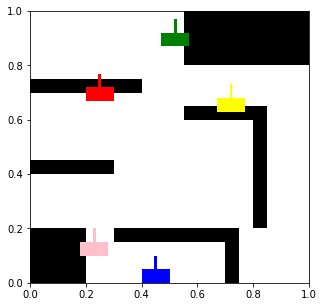

In [41]:
tank_parameters = {
        1: {'tank_coord_x':0.40,  'tank_coord_y':0.0,  'tank_angle':0, "tank_width": 0.1, 
            "tank_height": 0.05,  "canon_width": 0.01, "canon_height": 0.05, "color":"blue"},
        2: {'tank_coord_x':0.20,  'tank_coord_y':0.67,  'tank_angle':0, "tank_width": 0.1, 
            "tank_height": 0.05,  "canon_width": 0.01, "canon_height": 0.05, "color":"red"},
        3: {'tank_coord_x':0.47,  'tank_coord_y':0.87,  'tank_angle':0, "tank_width": 0.1, 
            "tank_height": 0.05,  "canon_width": 0.01, "canon_height": 0.05, "color":"green"},
        4: {'tank_coord_x':0.67,  'tank_coord_y':0.63,  'tank_angle':0, "tank_width": 0.1, 
            "tank_height": 0.05,  "canon_width": 0.01, "canon_height": 0.05, "color":"yellow"},
        5: {'tank_coord_x':0.18,  'tank_coord_y':0.10,  'tank_angle':0, "tank_width": 0.1, 
            "tank_height": 0.05,  "canon_width": 0.01, "canon_height": 0.05, "color":"pink"}
    }
_=display_scenario(obstacles, tank_parameters)

## Implementación del juego

Las normas de nuestro **Tank Royale** son sencillas:

* El tanque 1 comenzara en la posición x = 0.1, y = 0.2, ángulo de cañón = 0
* El tanque 2 comenzara en la posición x = 0.1, y = 0.9, ángulo de cañón = 180
* Empieza moviendo el jugador 1
* Si un tanque consigue tocar al otro tanque se acaba la partida
* En un turno, un jugador solo puede o mover su tanque o disparar. Por lo que dispondrá de las siguientes acciones:
    * Derecha  (d) 
    * Izquiera (a) 
    * Arriba   (w) 
    * Abajo    (s) 
    * Disparar (q) en cuyo caso se le pedirá en ángulo

::::{note}
Ya lo hemos utilizado varias veces a lo largo de este libro, pero te recordamos que para limpiar la celda del notebook entre turno y turno puedes usar la función:

:::{code}
clear_output(wait=True)
::: 

de la librería:

:::{code}
from IPython.display import clear_output
:::
::::

:::{tip}
Considera el uso de la función **sleep** de la librería **time** cuando consideres que el juego debe pausarse unos segundos.
:::

Como te venimos repitiendo a lo largo de todos los capítulos de este libro, existen muchas formas de utilizar las funciones implementadas para programar el programa principal. Nosotros te vamos a mostrar la nuestra, pero te recomendamos, como siempre, que antes de mirar nuestra solución lo intentes por tu cuenta. En nuestra solución vamos a definir una serie de funciones adicionales que nos ayudarán a modularizar mejor el programa principal.

### Solución:

Vamos a empezar programando una función que nos permita alternar entre jugadores. La vamos a llamar **change_player(player)** y se limitará a alternar el contenido de la variable **player** de 1 a 2 y de 2 a 1. La función devolverá la versión actualizada de esa misma variable.

In [52]:
def change_player(player):
    return 1 if player == 2 else 2

Si le pasamos un **player=1** nos devuelve el player 2:

In [53]:
change_player(1)

2

Si le pasamos un **player=2** nos devuelve el player 1:

In [54]:
change_player(2)

1

Otra de las tareas que convendría empaquetar en una función es la presentación de la información del juego informando a quién le toca jugar y la lista de posibles acciones. Todo esto lo vamos a meter en la función **print_menu(player)**. La función sólo recibe un único argumento de entrada con el identificador del jugador y realiza las siguientes acciones:

* Mostrar el jugador al que le toca realizar una acción
* Mostrar la lista de acciones
* Recibir el input del jugador

En caso de que la acción seleccionada sea la de disparar, hay que preguntar también por el ángulo de disparo.
La función debe devolver la acción seleccionada y el angulo de disparo. Vamos a añadir una última acción para que cuando el jugador pulse la tecla "x" el juego termine de manera anticipada.

In [45]:
def print_menu(player):
    print("Player: " + str(player))
    print("Choose action:")
    print("    - Move right (d)")
    print("    - Move left  (a)")
    print("    - Move up    (w)")
    print("    - Move down  (s)")
    print("    - Shoot:     (q)")
    print("    - Exit:      (x)")
    user_action = input("Action: ")
    angle = 0
    if user_action == 'q':
        angle = input("Chose shooting angle: ")
    return user_action, float(angle)

In [46]:
print_menu(1)

Player: 1
Choose action:
    - Move right (d)
    - Move left  (a)
    - Move up    (w)
    - Move down  (s)
    - Shoot:     (q)
    - Exit:      (x)
Action: q
Chose shooting angle: 45


('q', 45.0)

Para registrar el resto de parámetros del juego, vamos a utilizar el diccionario **tank_parameters**. Por el momento sólo vamos a definir una *key* para identificar la velocidad de desplazamiento de los tanques: **"tank_units"**. Disponer de esta variable te permitiría conseguir que los tanques de diferentes jugadores avancen a diferentes velocidades. Y esta velocidad podría variar en función de los daños recibidos o al pasar por algunas casillas especiales del tablero que asignaran mejoras a los vehículos. 

Podríamos añadir otras claves para futuras extensiones del juego, por ejemplo **"armor_level"** para definir diferentes niveles de resistencia a impactos, **"shooting_range"** para definir diferentes alcances del cañón, **"weapon_type"** para definir diferentes armas,...

In [47]:
tank_parameters = {
        1: {'tank_coord_x':0,  'tank_coord_y':0,  'tank_angle':0, "tank_width": 0.1, 
            "tank_height": 0.05,  "canon_width": 0.01, "canon_height": 0.05, "color":"blue",
            "tank_units" : 0.05},
        2: {'tank_coord_x':0.9,  'tank_coord_y':0.8,  'tank_angle':0, "tank_width": 0.1, 
            "tank_height": 0.05,  "canon_width": 0.01, "canon_height": 0.05, "color":"red",
            "tank_units" : 0.05}}

De esta manera, el movimiento de un tanque en una determinada dirección quedaría definido por la función **movement(player,tank_parameters,user_action)**. Recordar que en caso de que el usuario seleccione el movimiento en una dirección y dicho movimiento no sea posible porque el tanque impacta contra una pared o un obstáculo, el código debe informar al jugador y volver a ofrecer la posibilidad de introducir un movimiento nuevo.

In [48]:
from time import sleep

def movement(player,tank_parameters,user_action):
    new_x, new_y = move_tank(tank_parameters[player]['tank_coord_x'],
                             tank_parameters[player]['tank_coord_y'], 
                             tank_parameters[player]['tank_units'], 
                             user_action)
    if validate_mov(new_x,new_y,player,tank_parameters,obstacles_x, obstacles_y):
        tank_parameters[player]['tank_coord_x'] = new_x
        tank_parameters[player]['tank_coord_y'] = new_y  
        return True
    else:
        print("Movement not allowed",new_x, new_y)
        sleep(4)
        return False

Respecto al disparo, en caso de que el jugador seleccione la acción "q" y proporcione un ángulo **angle**, el código debe actualizar la key *tank_angle* con el valor del ángulo adecuado, calcular la trayectoria de la bala y detectar si alguno de los puntos de esa trayectoria impacta con una pared u obstáculo o por el contrario impacta contra algún tanque. También debe devolver la trayectoria hasta el impacto. Estas acciones podemos empaquetarlas en una nueva función **shoot** que recibe como argumentos:

* **player** con el identificador del tanque
* **tank_parameters** con los parámetros del juego
* **angle** con el ángulo de disparo
* **obstacles_x** y **obstacles_y** con las coordenadas de los obstáculos

Y devuelve:

* **hit** que contiene una variable buleana de valor **True** en caso de que haya impacto con el tanque enemigo o **False** en caso contrario
* **ray_x, ray_y** que son dos variables de tipo lista con las coordenadas X e Y con la trayectoria del disparo

In [49]:
def shoot (player,tank_parameters, angle, obstacles_x, obstacles_y):
    enemy = change_player(player)
    tank_parameters[player]['tank_angle'] = angle
    ray_x, ray_y =  shoot_rays(tank_parameters[player]['tank_coord_x']+tank_parameters[player]['tank_width']/2,
                            tank_parameters[player]['tank_coord_y']+tank_parameters[player]['tank_height'],
                            angle)

    for i in range(len(ray_x)):
        obstacle_impact = not validate_coord(ray_x[i], ray_y[i], obstacles_x, obstacles_y)
        tank_impact = not validate_coord(ray_x[i], ray_y[i], 
                                [[tank_parameters[enemy]['tank_coord_x'], tank_parameters[enemy]['tank_coord_x'] + tank_parameters[enemy]['tank_width']]],
                                [[tank_parameters[enemy]['tank_coord_y'], tank_parameters[enemy]['tank_coord_y'] + tank_parameters[enemy]['tank_height']]])
        if obstacle_impact:
            hit=False
            return hit, ray_x[:i],ray_y[:i]
        elif tank_impact:
            hit=True
            return hit,ray_x[:i],ray_y[:i]
        else:
            pass

:::{note}
El código se limita a ir validando cada uno de los puntos de la trayectoria de disparo. Para cada uno de esos puntos, analizamos si ha impactado con algún osbtáculo o con algún tanque. En caso de que se produzca algún impacto contra un vehículo, el bucle se aborta y la variable **hit** toma el valor **True**. Si el impacto se ha producido contra un obstáculo, la variable **hit** toma el valor **False**. Si no se ha producido ningún impacto, el bucle continíua. Al final, en el peor de los casos, la trayectoria terminará impactando con una pared.
:::

Podemos comprobar su funcionamiento definiendo un escenario y simulando un disparo con una determinada inclinación. Vamos a comprobar el disparo contra un obstáculo:

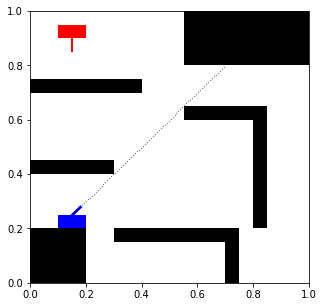

Hit any tank:  False


In [50]:
tank_parameters = {
    1: {'tank_coord_x':0.1,  'tank_coord_y':0.2,  'tank_angle':0, "tank_width": 0.1, 
        "tank_height": 0.05,  "canon_width": 0.01, "canon_height": 0.05, "color":"blue",
        "tank_units" : 0.05},
    2: {'tank_coord_x':0.1,  'tank_coord_y':0.9,  'tank_angle':180, "tank_width": 0.1, 
        "tank_height": 0.05,  "canon_width": 0.01, "canon_height": 0.05, "color":"red",
        "tank_units" : 0.05}}
    
hit, ray_x,ray_y = shoot(1,tank_parameters, -45, obstacles_x, obstacles_y)
ax =display_scenario(obstacles, tank_parameters, plot=False)
ax.plot(ray_x, ray_y,".", color="k", ms=0.4)
ax.axis([0,1,0,1])
plt.show()
print("Hit any tank: ",hit)

Comprobamos que la trayectoria termina en el primer obstáculo que encuentra, pero la variable **hit** no detecta un impacto contra ningún tanque. Vamos a modificar la escena para comprobar que el impacto contra tanques también está correctamente implementado:

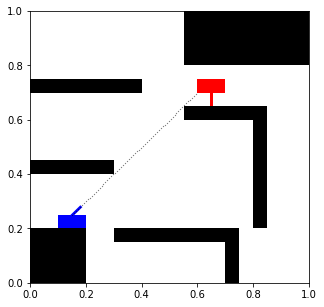

Hit any tank:  True


In [51]:
tank_parameters = {
    1: {'tank_coord_x':0.1,  'tank_coord_y':0.2,  'tank_angle':0, "tank_width": 0.1, 
        "tank_height": 0.05,  "canon_width": 0.01, "canon_height": 0.05, "color":"blue",
        "tank_units" : 0.05},
    2: {'tank_coord_x':0.6,  'tank_coord_y':0.7,  'tank_angle':180, "tank_width": 0.1, 
        "tank_height": 0.05,  "canon_width": 0.01, "canon_height": 0.05, "color":"red",
        "tank_units" : 0.05}}
    
hit, ray_x,ray_y = shoot(1,tank_parameters, -45, obstacles_x, obstacles_y)
ax =display_scenario(obstacles, tank_parameters, plot=False)
ax.plot(ray_x, ray_y,".", color="k", ms=0.4)
ax.axis([0,1,0,1])
plt.show()
print("Hit any tank: ",hit)

En este caso, la función **shoot** devuelve un impacto postivo.

::::{note}
El motivo de utilizar el código:

:::{code}
ax.plot(ray_x, ray_y,".", color="k", ms=0.4)
ax.axis([0,1,0,1])
:::

Se debe a que al añadir nuevos elementos a la escena, las coordenadas pueden verse modificadas ya que **matplotlib** siempre intenta optimizar los rangos de visualización. Para asegurarnos que las coordenadas siguen siendo [0,1] en ambos ejes utilizamos la función **axis**.

Por otro lado, la función **draw_tank** dibuja correctamente la posición del cañón para cualquier ángulo de disparo (que se ajuste con la referencia que hemos seguido en este juego). El problema es que la trayectoria de la bala, tal y como hemos definido la función **shoot**, siempre se inicia en la mitad superior del tanque. Esto significa que si disparamos con un ángulo de 270º, la trayectoria de la bala no se iniciará exáctamente en la posición del cañón. No afecta a la jugabilidad, pero el efecto es algo feo. Puedes comprobarlo con el código:

:::{code}
hit, ray_x,ray_y = shoot(1,tank_parameters, 270, obstacles_x, obstacles_y)
ax =display_scenario(obstacles, tank_parameters, plot=False)
ax.plot(ray_x, ray_y,".", color="k", ms=0.4)
ax.axis([0,1,0,1])
plt.show()
:::

La solución es bastante sencilla e implica modificar la función **shoot** para que las coordenadas de origen de la bala con las que invocamos a **shoot_rays** sean siempre las de base del cañón, que a su vez van a dependar del ángulo de disparo. Te proponemos esta modificación como una posible mejora del juego. 
::::

Finalmente, ya puedes construir la función principal que incorpora todas las funciones anteriores:

In [116]:
from IPython.display import clear_output

def main():

    obstacles_x = [ [0, 0.2], [0.3, 0.7], [0, 0.3], [0.8, 0.85], [0.55, 0.85], [0.55, 1.0], [0.0, 0.4], [0.7, 0.75] ]
    obstacles_y = [ [0, 0.2], [0.15, 0.2], [0.4, 0.45], [0.2, 0.6], [0.6, 0.65], [0.8, 1.25], [0.7, 0.75], [0.0, 0.2] ]
    obstacles = format_coord(obstacles_x,obstacles_y)

    tank_parameters = {
        1: {'tank_coord_x':0.1,  'tank_coord_y':0.2,  'tank_angle':0, "tank_width": 0.1, 
            "tank_height": 0.05,  "canon_width": 0.01, "canon_height": 0.05, "color":"blue",
            "tank_units" : 0.05},
        2: {'tank_coord_x':0.1,  'tank_coord_y':0.9,  'tank_angle':180, "tank_width": 0.1, 
            "tank_height": 0.05,  "canon_width": 0.01, "canon_height": 0.05, "color":"red",
            "tank_units" : 0.05}}

    player=1
    hit = False
    while not hit:
        clear_output(wait=True)
        ax =display_scenario(obstacles, tank_parameters)
        action, angle = print_menu(player)
        if action == "x":
            break
        elif action == "q":
            clear_output(wait=True)
            ax =display_scenario(obstacles, tank_parameters, plot=False)
            save_axis=ax.axis()
            hit = shoot(player,tank_parameters, angle, obstacles_x, obstacles_y,ax)
            ax.axis(save_axis)
            plt.show()
            time.sleep(4)
            if not hit:
                player=change_player(player)
        else: # movement
            if movement(player,tank_parameters,action)==True:
                player=change_player(player)

    if hit==True:
        print("Player {} has won the game".format(player))

Para probar el juego, sólo tienes que invocar a la función **main**.

In [ ]:
main()

## Extensiones del juego

La versión que hemos programado es muy sencilla, a continuación te damos algunas ideas de mejora que puedes intentar implementar:

* Añadir más de un tanque por equipo, de forma que en cada turno el jugador pueda decidir qué tanque mover
* Añadir diferentes tipos de tanques, con diferentes alcances o diferentes blindajes que les aporten diferentes grados de resistencia a los ataques de los enemigos
* Añadir la posibilidad de capturar unos objetos con propiedades especiales que aparecerán aleatoriamente distribuidos por el mapa. Estos objetos podrán otorgar capacidades aumentadas a los tanques, por ejemplo, mayor velocidad de desplazamiento, mejor blindaje o mayor alcance de disparo
* Añadir un sistema de créditos por tirada. Cada una de las acciones tendrá un consumo de créditos que los jugadores pueden decidir consumir en uno o varios tanques. En función de la cantidad de créditos disponible un jugador podrá sólo hacer un movimiento o un disparo, o por el contrario, encadenar varios movimientos o disparos del mismo o de varios tanques
* Implementar un sistema de recarga de los créditos descritos en el punto anterior. Estos créditos puede recargarse simplemente por el paso del tiempo, o por la captura de unos objetos de recarga que aparecerán aleatoriamente en el mapa
* Conseguir que la trayectoria de la bala salga siempre desde la base del cañón
* Implementar un disparo parabólico en lugar de un disparo lineal
* Añadir la funcionalidad de que la bala pueda rebotar contra paredes u obstáculos, convirtiendo el juego en una especie de billar 